In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [135]:
df = pd.read_csv("../dataset/data.csv")
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,177.202253,54.303671,17.293811,17.293811,51.881433,17.227616,88.740028,...,Moderate,1,High,No,Yes,0,1.0,5.5,3.477124,healthy
99996,99997,22,Male,180.802297,40.033853,12.246712,12.246712,36.740135,12.159473,103.659560,...,Moderate,5,NaN,Yes,No,0,1.0,5.5,1.609656,healthy
99997,99998,37,Male,185.540653,84.536847,24.556580,24.556580,73.669741,24.172944,98.920422,...,Low,5,NaN,No,No,0,1.0,5.5,-9.736463,healthy
99998,99999,72,Female,181.796786,56.923335,17.223362,17.223362,51.670087,17.715475,54.559079,...,Low,4,High,Yes,Yes,0,1.0,5.5,-4.779376,healthy


In [136]:
df.shape

(100000, 48)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [138]:
df.isnull().sum()

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               7669
heart_rate                  14003
cholesterol                     0
glucose                         0
insulin                     15836
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_leve

In [139]:
int(df.duplicated().sum())

0

In [140]:
len(df.columns)

48

# Check Unique values

In [141]:
for i in range(0,df.shape[1]):
    print (df.columns[i] + " : "+ str(df[df.columns[i]].unique()) + "\n")

survey_code : [     1      2      3 ...  99998  99999 100000]

age : [56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]

gender : ['Male' 'Female']

height : [173.41687166 163.20737973 177.28196611 ... 185.5406531  181.79678601
 175.716378  ]

weight : [56.88664018 97.79985943 80.68756161 ... 84.53684746 56.92333529
 93.01728602]

bmi : [18.91592526 36.7162777  25.67305033 ... 24.55658022 17.22336227
 30.12584093]

bmi_estimated : [18.91592526 36.7162777  25.67305033 ... 24.55658022 17.22336227
 30.12584093]

bmi_scaled : [ 56.74777577 110.1488331   77.01915098 ...  73.66974065  51.67008681
  90.37752278]

bmi_corrected : [18.98911653 36.51141749 25.58742862 ... 24.17294361 17.71547549
 30.25407234]

waist_size : [72.16512976 85.59888896 90.29503037 ... 98.92042227 54.55907891
 70.74385139]

blood_pressure : [118.26425414 117.91798577 123.0736977  .

In [142]:
df.drop(columns=['environmental_risk_score','gene_marker_flag','electrolyte_level','survey_code'], inplace=True)

In [143]:
df.shape

(100000, 44)

In [144]:
df[['bmi','bmi_estimated','bmi_scaled','bmi_corrected']].sample(5)

,bmi,bmi_estimated,bmi_scaled,bmi_corrected
57856,34.627204,34.627204,103.881613,34.805751
89049,25.096802,25.096802,75.290407,24.827351
59422,24.661506,24.661506,73.984518,25.234936
32497,31.596182,31.596182,94.788545,31.368797
73897,30.195087,30.195087,90.585260,29.799062


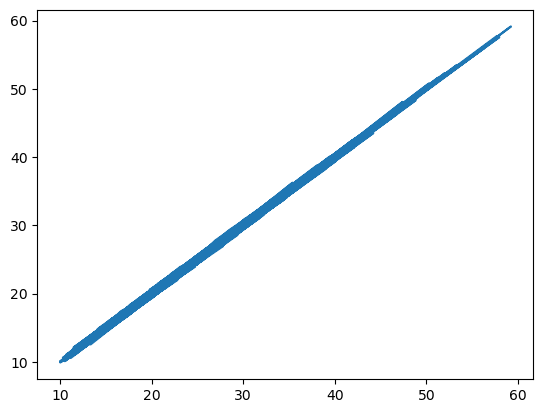

In [145]:
plt.plot(df['bmi'],df['bmi_corrected'])

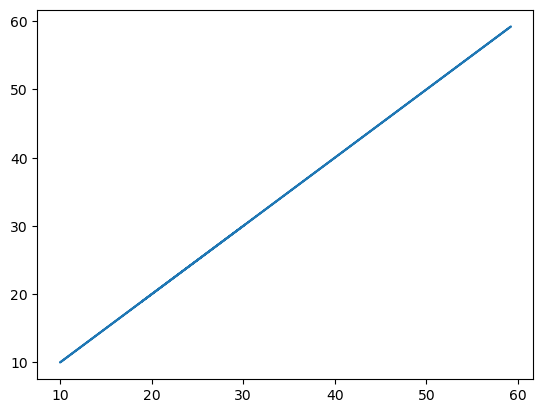

In [146]:
plt.plot(df['bmi'],df['bmi_estimated'])

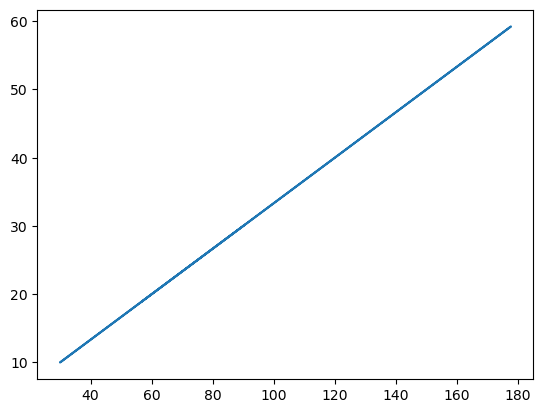

In [147]:
plt.plot(df['bmi_scaled'],df['bmi'])

In [148]:
df.drop(columns=['bmi_scaled','bmi_estimated','bmi_corrected'], inplace=True)

In [149]:
df.shape

(100000, 41)

In [150]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())

In [151]:
df['blood_pressure'].isna().sum()

np.int64(0)

In [152]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

In [153]:
print(num_cols)

['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'daily_supplement_dosage']


In [154]:
print(cat_cols)

['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner', 'target']


In [155]:
print(datetime_cols)

[]


In [156]:
print("\nCategorical summary (top categories):\n")
cat_summary = {}
for col in cat_cols:
    top = df[col].value_counts(dropna=False).head(6)
    cat_summary[col] = top.index.tolist(), top.values.tolist()
    print(f"Column: {col} — unique: {df[col].nunique(dropna=True)} — top values:")
    display(top)
    


Categorical summary (top categories):

Column: gender — unique: 2 — top values:


gender
Male      50132
Female    49868
Name: count, dtype: int64

Column: sleep_quality — unique: 4 — top values:


sleep_quality
Good         25147
Excellent    25091
Fair         25008
Poor         24754
Name: count, dtype: int64

Column: alcohol_consumption — unique: 2 — top values:


alcohol_consumption
NaN             42387
Occasionally    28831
Regularly       28782
Name: count, dtype: int64

Column: smoking_level — unique: 3 — top values:


smoking_level
Light         33437
Non-smoker    33355
Heavy         33208
Name: count, dtype: int64

Column: mental_health_support — unique: 2 — top values:


mental_health_support
No     50104
Yes    49896
Name: count, dtype: int64

Column: education_level — unique: 4 — top values:


education_level
Bachelor       25363
High School    25028
Master         24992
PhD            24617
Name: count, dtype: int64

Column: job_type — unique: 6 — top values:


job_type
Labor         16777
Unemployed    16711
Office        16704
Tech          16691
Service       16571
Healthcare    16546
Name: count, dtype: int64

Column: occupation — unique: 6 — top values:


occupation
Doctor      16927
Farmer      16719
Teacher     16661
Artist      16657
Driver      16562
Engineer    16474
Name: count, dtype: int64

Column: diet_type — unique: 4 — top values:


diet_type
Vegan         25122
Omnivore      25089
Vegetarian    25025
Keto          24764
Name: count, dtype: int64

Column: exercise_type — unique: 3 — top values:


exercise_type
Strength    25265
Cardio      24988
NaN         24969
Mixed       24778
Name: count, dtype: int64

Column: device_usage — unique: 3 — top values:


device_usage
High        33562
Moderate    33241
Low         33197
Name: count, dtype: int64

Column: healthcare_access — unique: 3 — top values:


healthcare_access
Good        33428
Moderate    33295
Poor        33277
Name: count, dtype: int64

Column: insurance — unique: 2 — top values:


insurance
Yes    50121
No     49879
Name: count, dtype: int64

Column: sunlight_exposure — unique: 3 — top values:


sunlight_exposure
Low         33468
Moderate    33451
High        33081
Name: count, dtype: int64

Column: caffeine_intake — unique: 2 — top values:


caffeine_intake
Moderate    33371
High        33368
NaN         33261
Name: count, dtype: int64

Column: family_history — unique: 2 — top values:


family_history
Yes    50055
No     49945
Name: count, dtype: int64

Column: pet_owner — unique: 2 — top values:


pet_owner
No     50153
Yes    49847
Name: count, dtype: int64

Column: target — unique: 2 — top values:


target
healthy     70097
diseased    29903
Name: count, dtype: int64

In [157]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
num_cols = [col for col in df.columns if df[col].dtype != "O" and col != "target"]
bool_cols = [col for col in df.columns if df[col].dtype == "bool"]

print("Cat_cols", cat_cols)
print("Sayısal Değişkenler:", num_cols)

Cat_cols ['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner', 'target']
Sayısal Değişkenler: ['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'daily_supplement_dosage']


count    100000.000000
mean         48.525990
std          17.886768
min          18.000000
25%          33.000000
50%          48.000000
75%          64.000000
max          79.000000
Name: age, dtype: float64


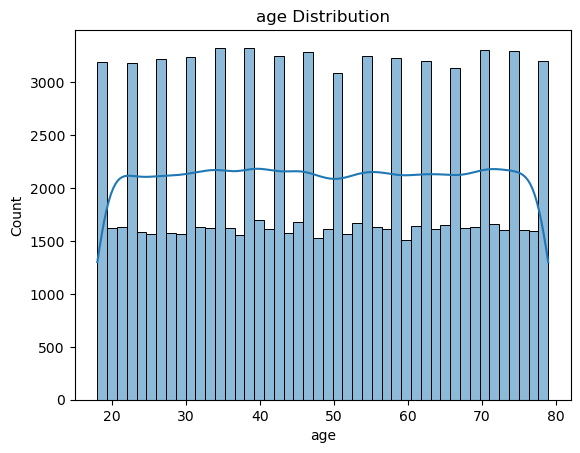

count    100000.000000
mean        170.023707
std           9.982798
min         140.000000
25%         163.306615
50%         170.016778
75%         176.728920
max         210.000000
Name: height, dtype: float64


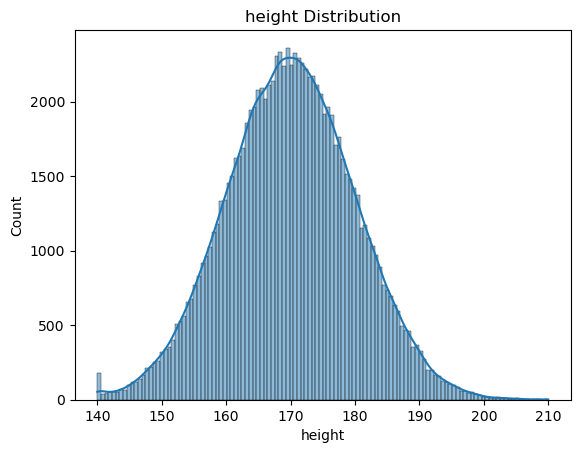

count    100000.000000
mean         70.064862
std          14.693667
min          40.000000
25%          59.856938
50%          69.924141
75%          80.027418
max         139.250894
Name: weight, dtype: float64


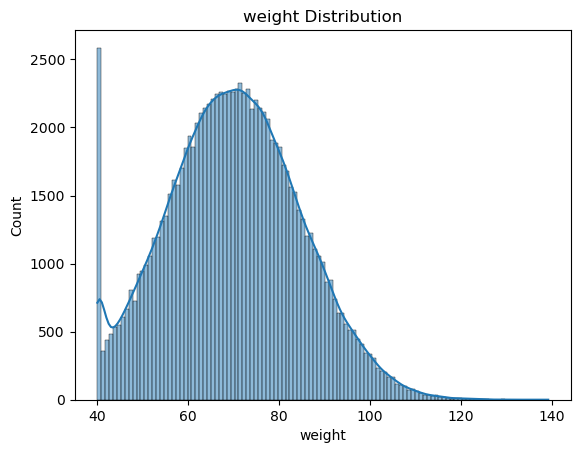

count    100000.000000
mean         24.493876
std           5.951069
min           9.988495
25%          20.271405
50%          24.156734
75%          28.258696
max          59.234792
Name: bmi, dtype: float64


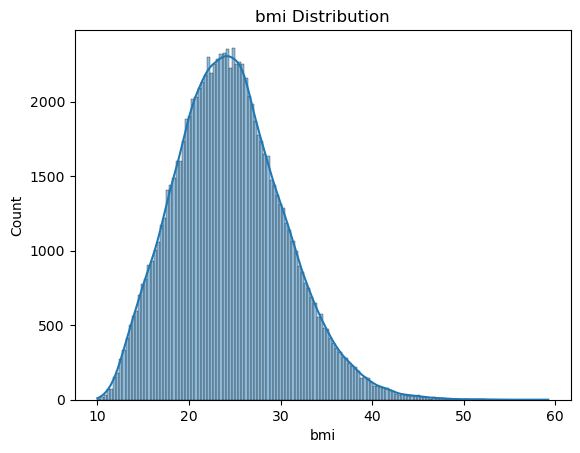

count    100000.000000
mean         84.933043
std          12.040314
min          34.093185
25%          76.795185
50%          84.957139
75%          93.018713
max         133.153631
Name: waist_size, dtype: float64


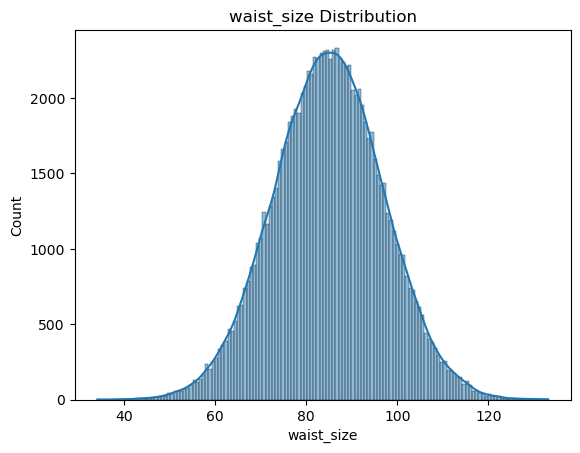

count    100000.000000
mean        119.977974
std          14.428246
min          59.128168
25%         110.815119
50%         119.951794
75%         129.185145
max         184.439195
Name: blood_pressure, dtype: float64


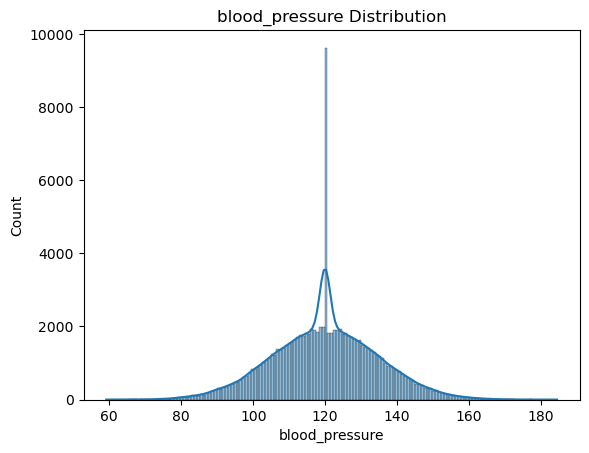

count    85997.000000
mean        74.969177
std          9.941668
min         34.745092
25%         68.275432
50%         75.046211
75%         81.685914
max        114.136041
Name: heart_rate, dtype: float64


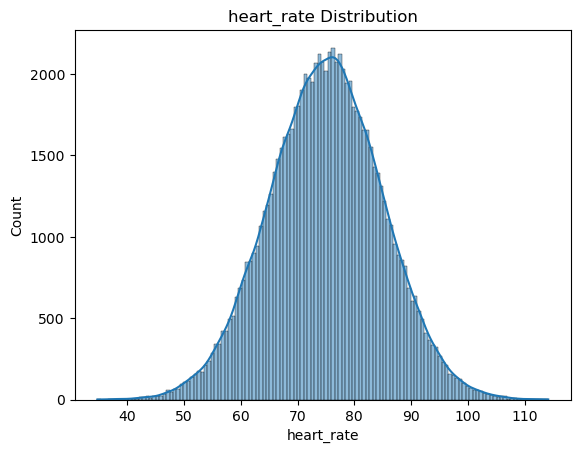

count    100000.000000
mean        189.966438
std          29.981934
min          58.410902
25%         169.667738
50%         190.044579
75%         210.222005
max         319.875613
Name: cholesterol, dtype: float64


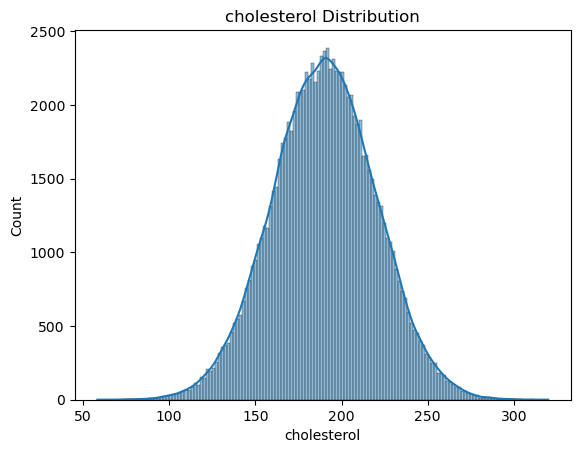

count    100000.000000
mean         99.994538
std          19.982828
min          12.434931
25%          86.461401
50%          99.986834
75%         113.508722
max         183.883548
Name: glucose, dtype: float64


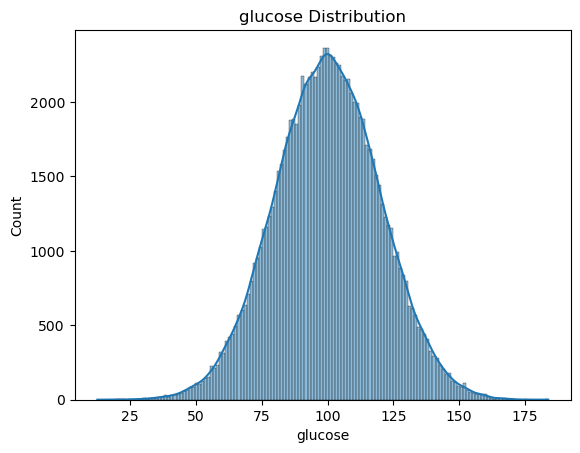

count    84164.000000
mean        14.988258
std          5.002783
min         -6.794483
25%         11.627114
50%         14.983414
75%         18.361928
max         35.464749
Name: insulin, dtype: float64


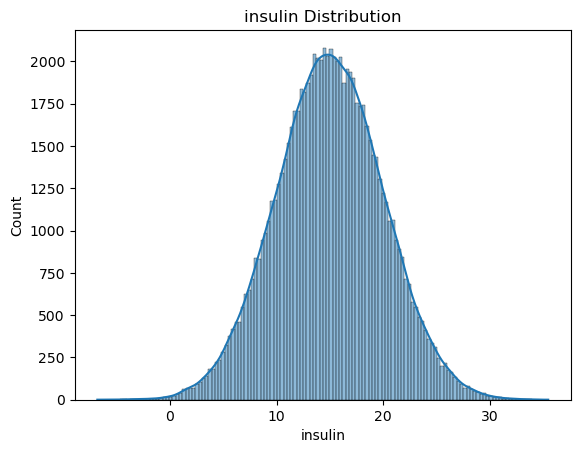

count    100000.000000
mean          7.002008
std           1.496821
min           3.000000
25%           5.986781
50%           6.998164
75%           8.019219
max          12.000000
Name: sleep_hours, dtype: float64


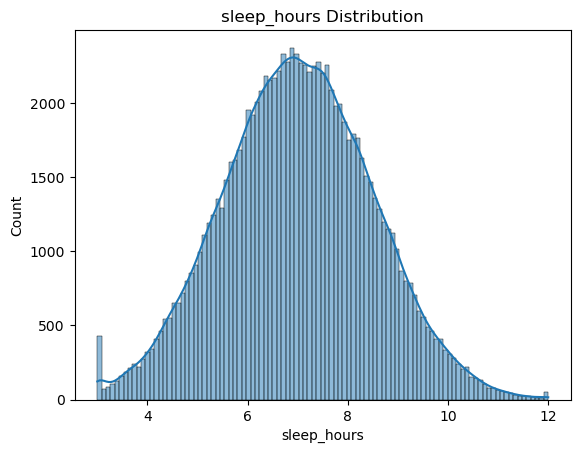

count    100000.000000
mean          8.001331
std           1.994723
min           0.000000
25%           6.651093
50%           8.004549
75%           9.353669
max          16.000000
Name: work_hours, dtype: float64


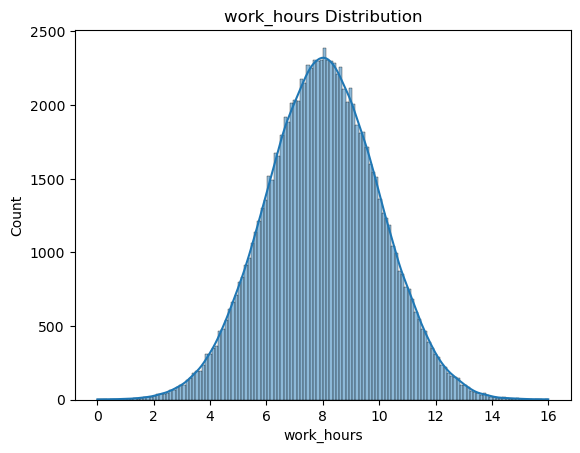

count    100000.000000
mean          3.038344
std           1.884475
min           0.000000
25%           1.633799
50%           2.971222
75%           4.326500
max          11.631898
Name: physical_activity, dtype: float64


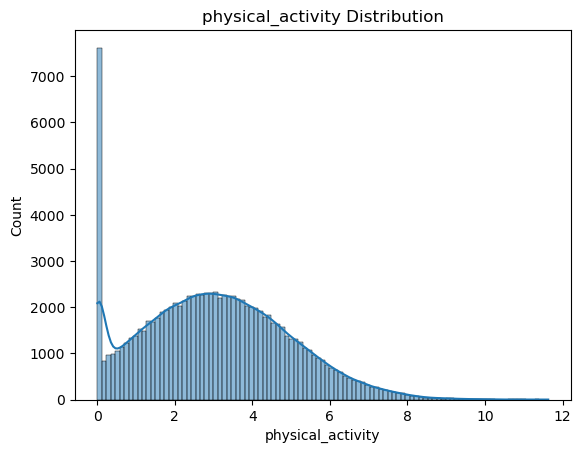

count    91671.000000
mean      7012.925748
std       2488.989356
min       1000.000000
25%       5320.858377
50%       7004.285450
75%       8702.281300
max      18064.969543
Name: daily_steps, dtype: float64


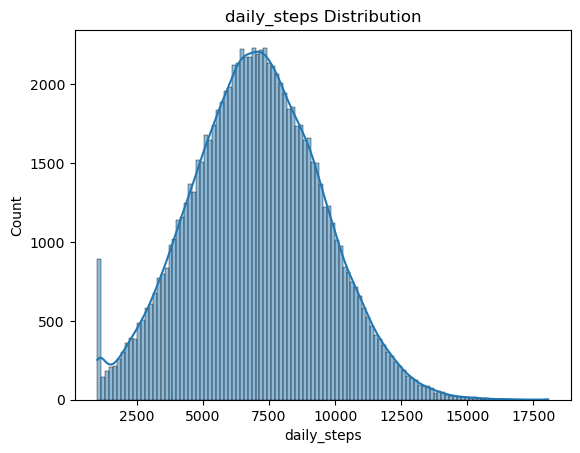

count    100000.000000
mean       2201.428579
std         400.516318
min         527.172360
25%        1932.278165
50%        2200.992765
75%        2471.218160
max        3949.019017
Name: calorie_intake, dtype: float64


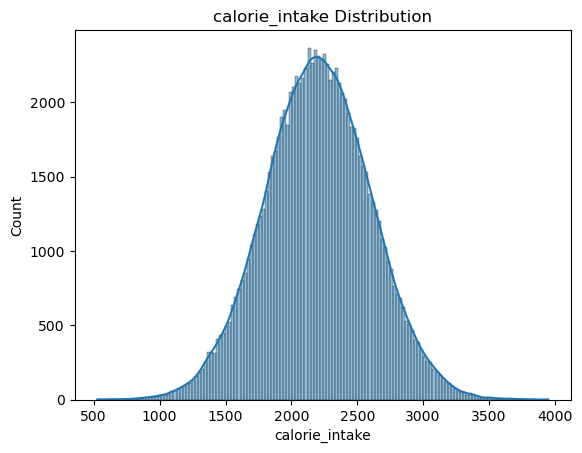

count    100000.000000
mean         60.047165
std          19.966850
min         -27.882444
25%          46.504292
50%          60.047905
75%          73.476386
max         141.514522
Name: sugar_intake, dtype: float64


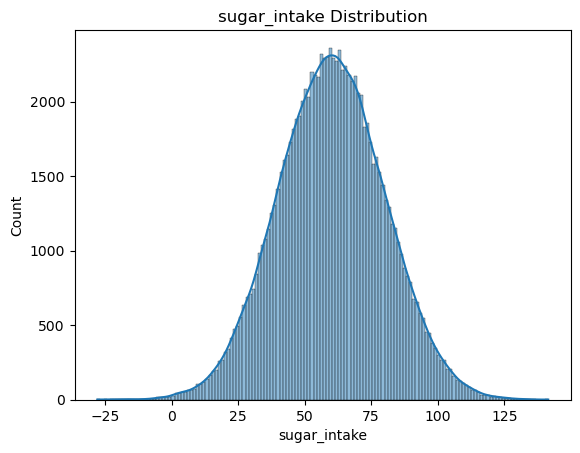

count    100000.000000
mean          2.006373
std           0.688868
min           0.500000
25%           1.532011
50%           2.000659
75%           2.473047
max           5.000000
Name: water_intake, dtype: float64


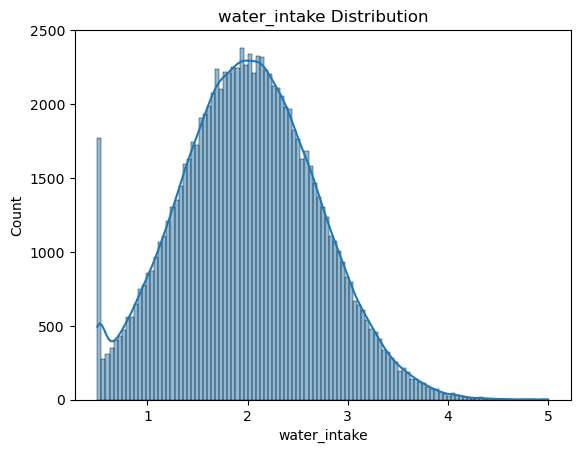

count    100000.000000
mean          6.021525
std           2.933835
min           0.000000
25%           3.971318
50%           5.991171
75%           8.024470
max          16.000000
Name: screen_time, dtype: float64


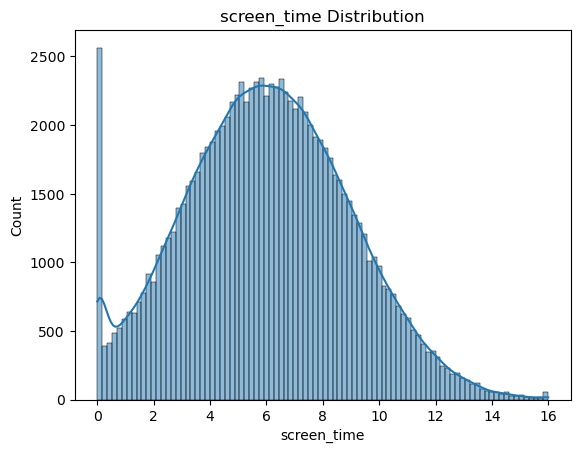

count    100000.000000
mean          4.991600
std           3.154997
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: stress_level, dtype: float64


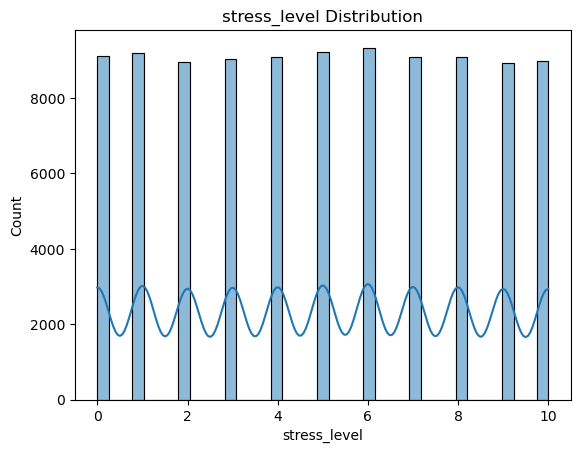

count    100000.000000
mean          5.004680
std           3.164228
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: mental_health_score, dtype: float64


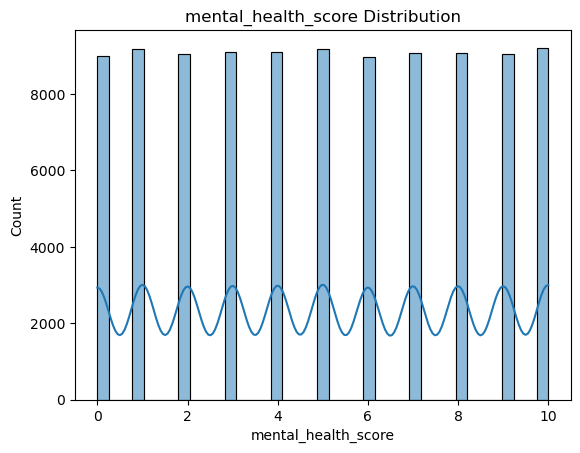

count    91530.000000
mean      4038.127284
std       1930.025678
min        500.000000
25%       2665.402843
50%       4004.601345
75%       5360.012694
max      12029.409353
Name: income, dtype: float64


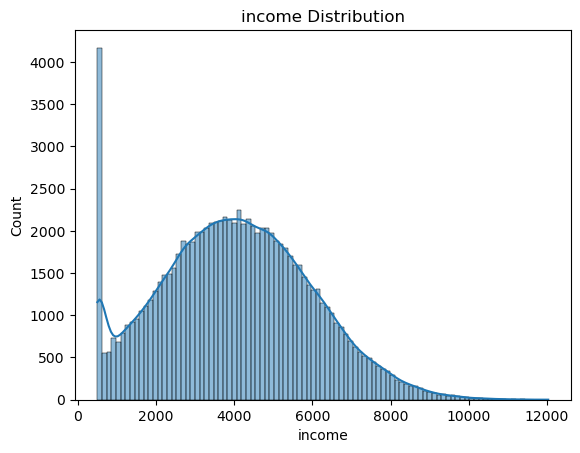

count    100000.000000
mean          2.998720
std           1.414786
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: meals_per_day, dtype: float64


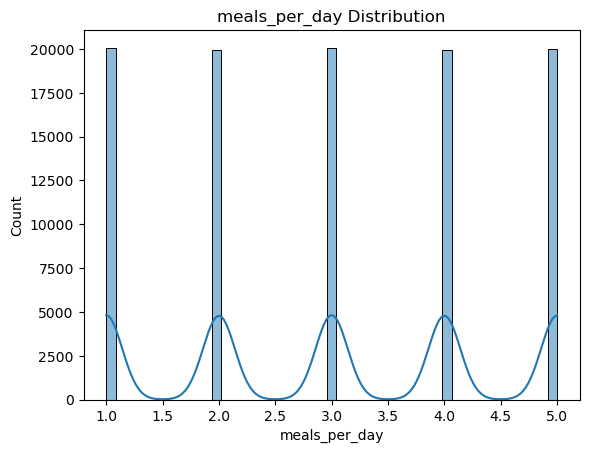

count    100000.000000
mean          0.015726
std           5.764489
min          -9.999895
25%          -4.980501
50%           0.015589
75%           5.008424
max           9.999966
Name: daily_supplement_dosage, dtype: float64


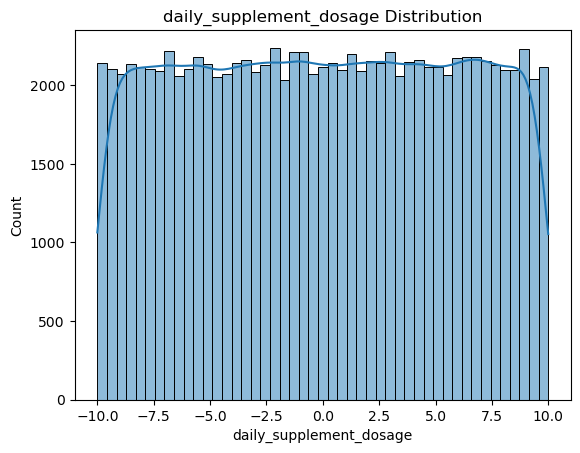

In [158]:
def summary_numeric(col):
    print(df[col].describe())
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

for col in num_cols:
    summary_numeric(col)

# Oulliers Detection

In [159]:
def outlier_thresholds(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def check_outliers(data, col):
    lower, upper = outlier_thresholds(data, col)
    return data[(data[col] < lower) | (data[col] > upper)]

for col in num_cols:
    print(f"{col} Outlier Count:", len(check_outliers(df, col)))

age Outlier Count: 0
height Outlier Count: 750
weight Outlier Count: 335
bmi Outlier Count: 936
waist_size Outlier Count: 706
blood_pressure Outlier Count: 1333
heart_rate Outlier Count: 612
cholesterol Outlier Count: 677
glucose Outlier Count: 680
insulin Outlier Count: 571
sleep_hours Outlier Count: 326
work_hours Outlier Count: 618
physical_activity Outlier Count: 341
daily_steps Outlier Count: 307
calorie_intake Outlier Count: 730
sugar_intake Outlier Count: 688
water_intake Outlier Count: 348
screen_time Outlier Count: 339
stress_level Outlier Count: 0
mental_health_score Outlier Count: 0
income Outlier Count: 315
meals_per_day Outlier Count: 0
daily_supplement_dosage Outlier Count: 0


# Replace Outliers with median

In [160]:
def replace_outliers_with_median(data, col):
    lower, upper = outlier_thresholds(data, col)
    median = data[col].median()
    data[col] = np.where((data[col] < lower) | (data[col] > upper), median, data[col])

for col in num_cols:
    replace_outliers_with_median(df, col)

# Filling Null values

In [161]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['int64', 'float64']):
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\CHAMA COMPUTERS\AppData\Local\Temp\ipykernel_35096\2457469232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\CHAMA COMPUTERS\AppData\Local\Temp\ipykernel_35096\2457469232.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [162]:
df.isnull().sum()

age                        0
gender                     0
height                     0
weight                     0
bmi                        0
waist_size                 0
blood_pressure             0
heart_rate                 0
cholesterol                0
glucose                    0
insulin                    0
sleep_hours                0
sleep_quality              0
work_hours                 0
physical_activity          0
daily_steps                0
calorie_intake             0
sugar_intake               0
alcohol_consumption        0
smoking_level              0
water_intake               0
screen_time                0
stress_level               0
mental_health_score        0
mental_health_support      0
education_level            0
job_type                   0
occupation                 0
income                     0
diet_type                  0
exercise_type              0
device_usage               0
healthcare_access          0
insurance                  0
sunlight_expos

# One Hot Encoding

In [163]:
def encode_categorical_columns(df):
   

    label_encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object', 'category']).columns:
        unique_vals = df[col].nunique()

        if unique_vals == 2:
            # Label Encoding
            df[col] = label_encoder.fit_transform(df[col])
        elif unique_vals > 2:
            # One-Hot Encoding + bool'dan int'e dönüştürme
            dummies = pd.get_dummies(df[col], prefix=col).astype(int)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    return df

In [164]:
df = encode_categorical_columns(df)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   gender                       100000 non-null  int64  
 2   height                       100000 non-null  float64
 3   weight                       100000 non-null  float64
 4   bmi                          100000 non-null  float64
 5   waist_size                   100000 non-null  float64
 6   blood_pressure               100000 non-null  float64
 7   heart_rate                   100000 non-null  float64
 8   cholesterol                  100000 non-null  float64
 9   glucose                      100000 non-null  float64
 10  insulin                      100000 non-null  float64
 11  sleep_hours                  100000 non-null  float64
 12  work_hours                   100000 non-null  float64
 13  

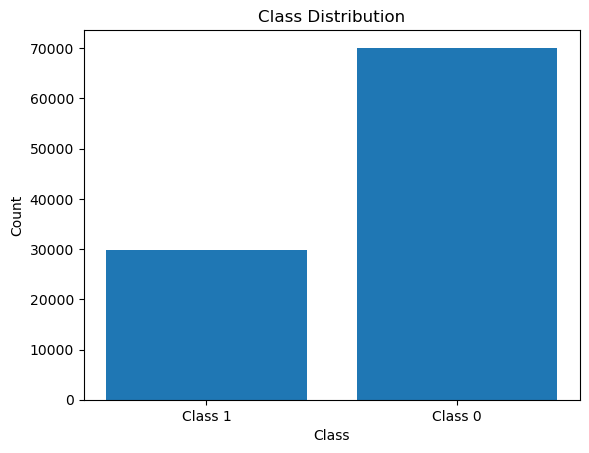

In [166]:
x=df.drop(["target"],axis=1)
y=df["target"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

# SMOTE for target variable

In [104]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

target
1    70097
0    70097
Name: count, dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   gender                       100000 non-null  int64  
 2   height                       100000 non-null  float64
 3   weight                       100000 non-null  float64
 4   bmi                          100000 non-null  float64
 5   waist_size                   100000 non-null  float64
 6   blood_pressure               100000 non-null  float64
 7   heart_rate                   100000 non-null  float64
 8   cholesterol                  100000 non-null  float64
 9   glucose                      100000 non-null  float64
 10  insulin                      100000 non-null  float64
 11  sleep_hours                  100000 non-null  float64
 12  work_hours                   100000 non-null  float64
 13  

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
df1 = df.sample(10000)

In [170]:
x=df1.drop(["target"],axis=1)
y=df1["target"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SMOTE - Training target

In [172]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X_train,y_train=smote.fit_resample(X_train,y_train)
y_train.value_counts()

target
1    5588
0    5588
Name: count, dtype: int64

# Model Training

In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Example: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.72      1.00      0.84      1447

    accuracy                           0.72      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.52      0.72      0.61      2000



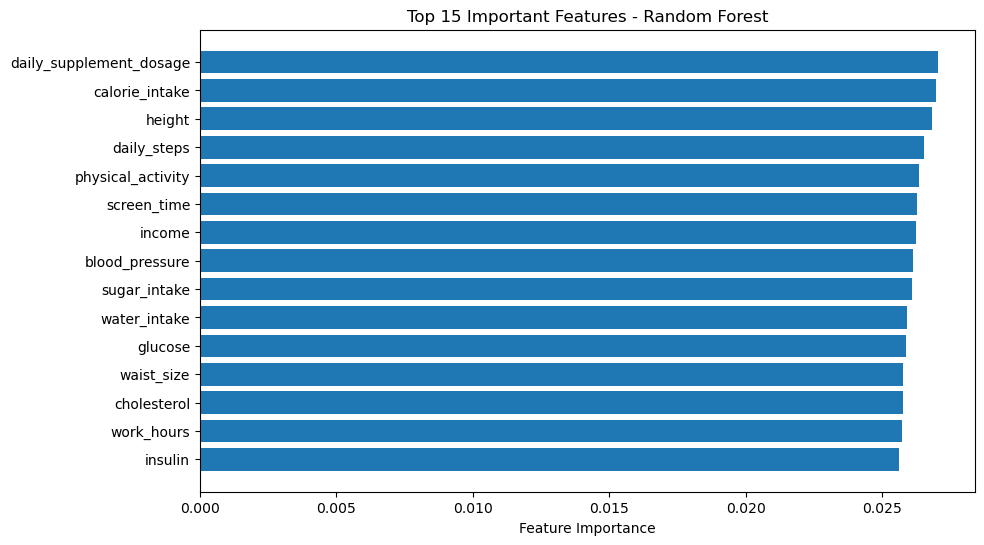

In [175]:
# Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns  # original column names

# Sort by importance
indices = np.argsort(importances)[::-1]

# Display top 15 features
top_n = 15
plt.figure(figsize=(10,6))
plt.barh(range(top_n), importances[indices][:top_n][::-1], align="center")
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features - Random Forest")
plt.show()

In [176]:
important_fea = [feature_names[i] for i in indices[:top_n]][::-1]
important_fea

['insulin',
 'work_hours',
 'cholesterol',
 'waist_size',
 'glucose',
 'water_intake',
 'sugar_intake',
 'blood_pressure',
 'income',
 'screen_time',
 'physical_activity',
 'daily_steps',
 'height',
 'calorie_intake',
 'daily_supplement_dosage']

# Model2

In [177]:
x=df1.drop(columns=important_fea)
y=df1["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [178]:
smote=SMOTE(sampling_strategy='minority') 
X_train,y_train=smote.fit_resample(X_train,y_train)
y_train.value_counts()

target
1    5588
0    5588
Name: count, dtype: int64

In [179]:
# Example: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       553
           1       1.00      1.00      1.00      1447

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
Model 